<a href="https://colab.research.google.com/github/purva-024/Project/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

try:
  df = pd.read_csv('/content/Iris (1).csv')
  print("CSV file loaded successfully!")
except FileNotFoundError:
  print("Error: The file 'Iris (1).csv' was not found.")
except Exception as e:
  print(f"An error occurred: {e}")

CSV file loaded successfully!


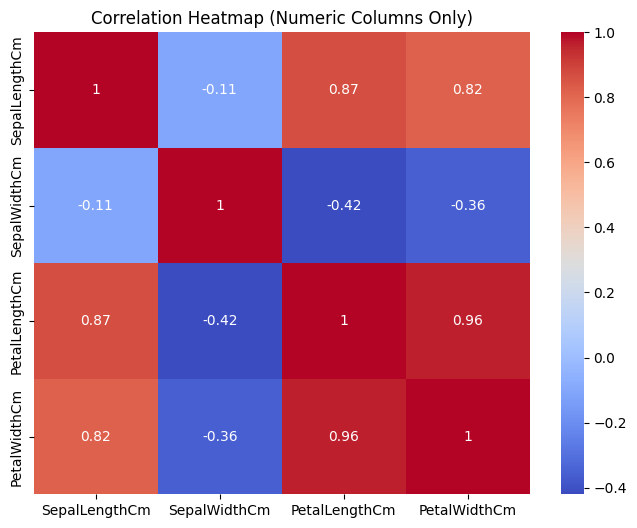


--- Model Evaluation ---
Mean Squared Error (MSE): 0.0464
R-squared (R²): 0.9269

--- Regression Equation ---
Intercept: -0.1791
SepalLengthCm: -0.2379
SepalWidthCm: 0.2430
PetalLengthCm: 0.5367


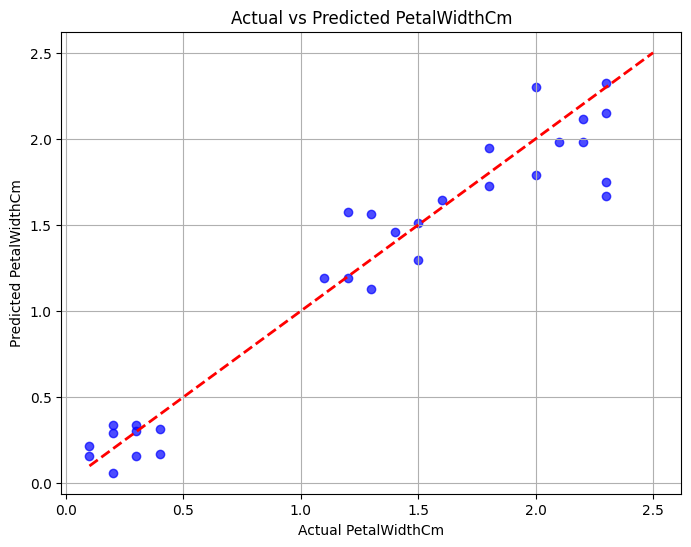

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Drop unnecessary index column
df = df.drop(columns=["Id"], errors='ignore')

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Display correlations
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

# Define features and target variable (excluding 'Species' which is not numeric)
# Assuming the task is to predict one of the numeric columns, let's predict 'PetalWidthCm' as an example
X = numeric_df.drop(columns=['PetalWidthCm'])
y = numeric_df["PetalWidthCm"]


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("\n--- Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Print model coefficients
print("\n--- Regression Equation ---")
print(f"Intercept: {model.intercept_:.4f}")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

# Visualization: Actual vs Predicted Sales (adjusting labels for PetalWidthCm)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel("Actual PetalWidthCm")
plt.ylabel("Predicted PetalWidthCm")
plt.title("Actual vs Predicted PetalWidthCm")
plt.grid(True)
plt.show()

# Task
Build a machine learning model to classify Iris flower species (setosa, versicolor, virginica) based on their measurements. Use the Iris dataset, train a classification model using libraries like Scikit-learn, evaluate its accuracy and performance, and explain basic classification concepts.

## Load and prepare data

### Subtask:
Load the Iris dataset and prepare it for model training, including splitting the data into training and testing sets.


**Reasoning**:
Define the features and target variable and then split the data into training and testing sets.



In [8]:
# Define features (X) and target variable (y)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets.
X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


## Choose and train a classification model

### Subtask:
Select a suitable classification algorithm (e.g., Logistic Regression, Decision Tree, or Support Vector Machine) and train it on the training data.


**Reasoning**:
Import and train a Logistic Regression model on the training data.



In [9]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## Evaluate the model

### Subtask:
Evaluate the trained model's performance using appropriate metrics like accuracy, precision, recall, and F1-score on the test data.


**Reasoning**:
Calculate and print the accuracy, precision, recall, and F1-score of the trained model on the test data.



In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("\n--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


--- Model Performance Metrics ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


## Visualize results

### Subtask:
Visualize the model's performance or decision boundaries if applicable.


**Reasoning**:
Generate a confusion matrix and a classification report to visualize the model's performance and show detailed metrics for each class.



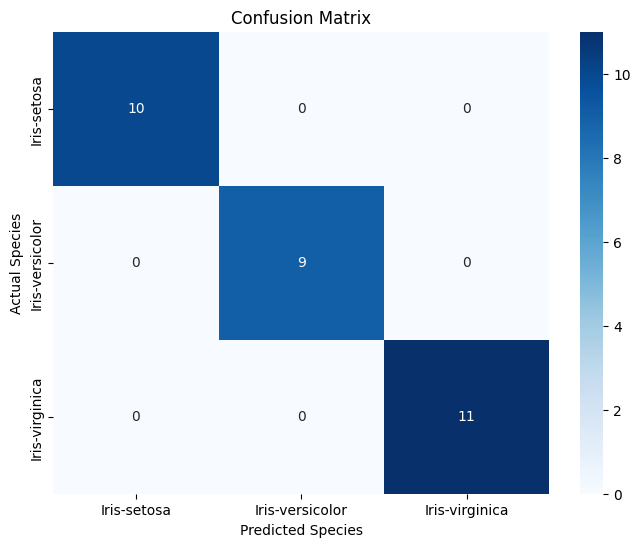


--- Classification Report ---
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.title('Confusion Matrix')
plt.show()

# Generate the classification report
class_report = classification_report(y_test, y_pred, target_names=model.classes_)

# Print the classification report
print("\n--- Classification Report ---")
print(class_report)

## Summary:

### Data Analysis Key Findings

*   The data was successfully split into training (80%) and testing (20%) sets, resulting in 120 training samples and 30 testing samples.
*   A Logistic Regression model was trained on the training data.
*   The trained Logistic Regression model achieved perfect scores (1.0000) for accuracy, precision, recall, and F1-score on the test set.
*   The confusion matrix showed that the model correctly classified all 30 instances in the test set across the three Iris species (10 setosa, 9 versicolor, and 11 virginica).
*   The classification report confirmed the perfect precision, recall, and F1-score of 1.00 for each individual class (setosa, versicolor, and virginica).

### Insights or Next Steps

*   The Logistic Regression model performed exceptionally well on this specific Iris dataset test set, achieving 100% accuracy.
*   Consider exploring other classification algorithms or cross-validation techniques to confirm the model's robustness and generalize its performance evaluation.


## Load and prepare data

### Subtask:
Load the Iris dataset and prepare it for model training, including splitting the data into training and testing sets.

**Reasoning**:
Define the features and target variable and then split the data into training and testing sets.

In [12]:
# Define features (X) and target variable (y)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets.
X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


## Choose and train a classification model

### Subtask:
Select a suitable classification algorithm (e.g., Logistic Regression, Decision Tree, or Support Vector Machine) and train it on the training data.

**Reasoning**:
Import and train a Logistic Regression model on the training data.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")